In [25]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import matplotlib.pyplot  as plt

In [26]:
df = pd.read_csv('Drugi domaći zadatak/bank-additional.csv', sep = ';')
pd.set_option('display.max_columns', 100)          #Da se prikazu sve kolone
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [27]:
#Tipovi podataka

df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object

In [29]:
#Malo info o podacima

df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

(4119, 21)

In [30]:
#Raspodele vrednosti

df.describe()  # Ovo je za numericke

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


In [31]:
#Raspodele kategorickih vrednosti 

df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,12,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,5228.1,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,1625,3667


In [32]:
#Null vrednosti

missing_values = df.isnull().sum()

missing_values



age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 1
dtype: int64

In [33]:
# Unknown vrednosti po kolonama

df.isin(['unknown']).sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

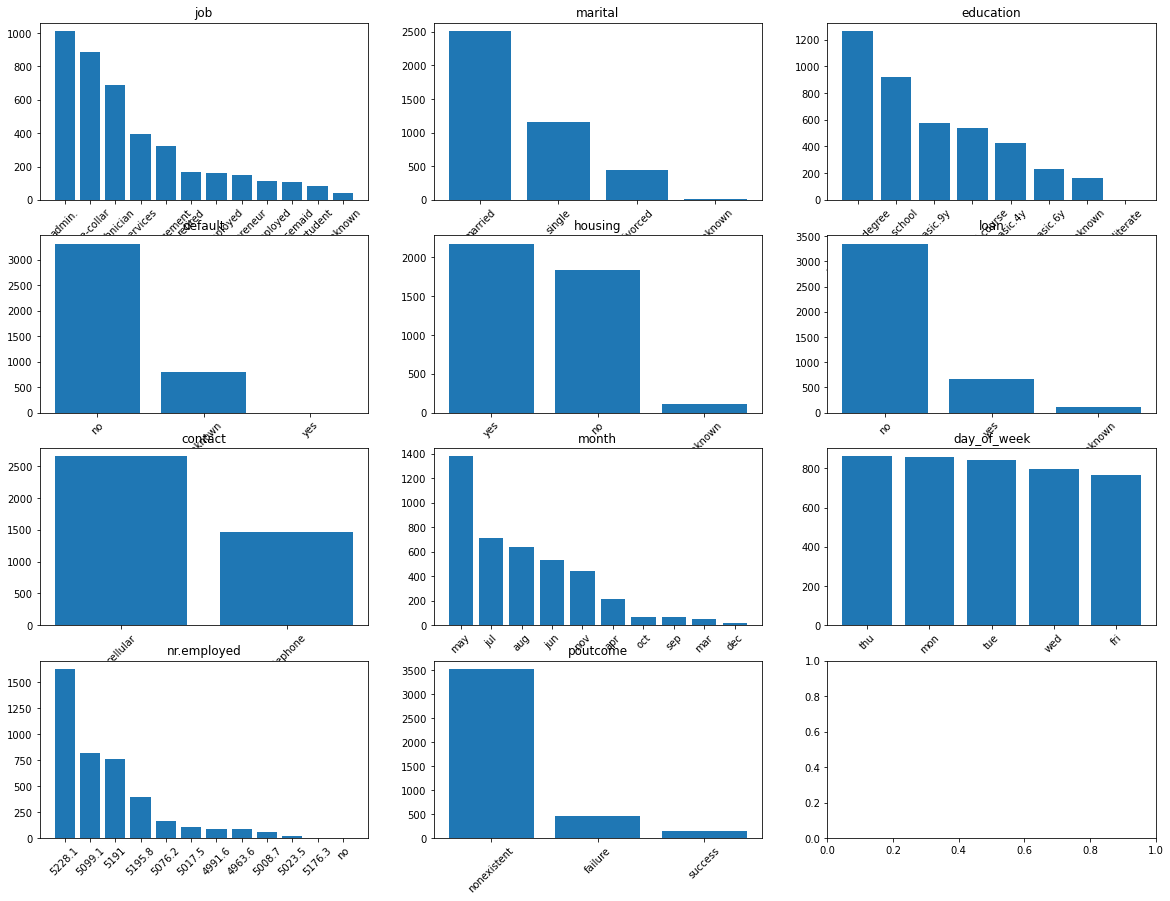

In [34]:
#Vizualizacija kategorickih

#cat_columns = data.columns.is_object
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week','nr.employed','poutcome']

fig, axs = plt.subplots(4, 3, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(45)
    
    counter += 1

plt.show()

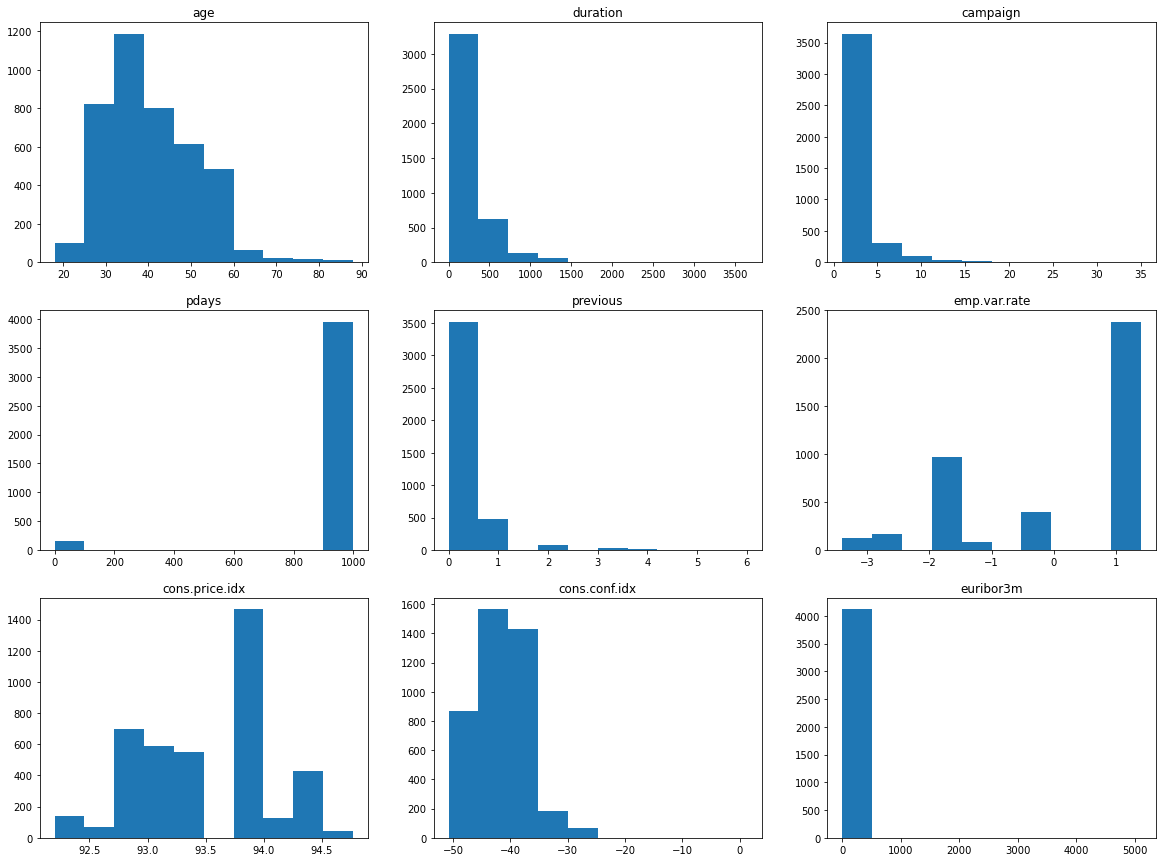

In [35]:
#Vizualizacija numerickih

num_columns = ['age','duration', 'campaign','pdays', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']

fig, axs = plt.subplots(3, 3, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    
    counter += 1

plt.show()

Ovaj euribor ne izgleda ovako kad se izbace null vrednosti.

In [36]:
df[['pdays', 'campaign', 'previous']].describe()


,pdays,campaign,previous
count,4119.000000,4114.000000,4117.000000
mean,960.422190,2.534273,0.190430
std,191.922786,2.566673,0.541904
min,0.000000,1.000000,0.000000
25%,999.000000,1.000000,0.000000
50%,999.000000,2.000000,0.000000
75%,999.000000,3.000000,0.000000
max,999.000000,35.000000,6.000000


pdays cemo izbaciti u cistcenju, a campaign i previous cemo vrednostima koje predstavljaju sum dodeliti mean kako ne bi bili outlieri

# Malo pregled veze y atributa i ostalih

<AxesSubplot:title={'center':'Vrednosti atributa y'}>

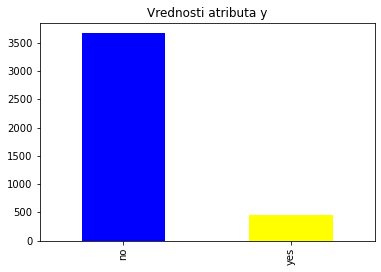

In [37]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Vrednosti atributa y', color = ['blue','yellow'])

<AxesSubplot:title={'center':'Atributi Job i y'}>

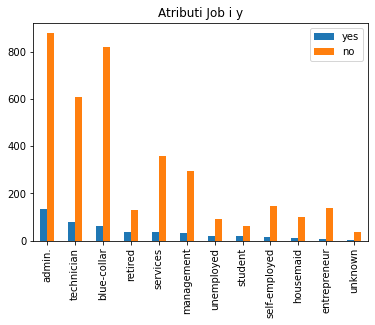

In [38]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Atributi Job i y')

<AxesSubplot:title={'center':'Marital i y'}>

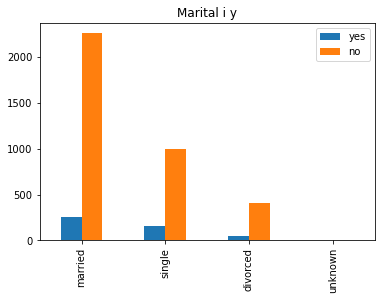

In [39]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital i y')

<AxesSubplot:title={'center':'Education i y'}>

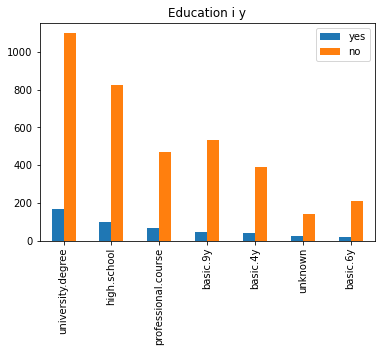

In [40]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education i y')

<AxesSubplot:title={'center':'contact i y'}>

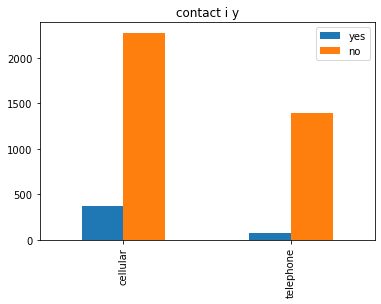

In [41]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'contact i y')

## Ajmo malo numericke podatke

In [42]:
num_columns = ['age','duration', 'campaign','pdays', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    a_df = pd.DataFrame()
    a_df['yes'] = (df[df['y'] == 'yes'][['y',num_column]].describe())[num_column]
    a_df['no'] = (df[df['y'] == 'no'][['y',num_column]].describe())[num_column]

    print('Atributi '+num_column+' i y :')
    print(a_df.describe())
    print('\n')
    
   
    
    counter +=1

Atributi age i y :
              yes           no
count    8.000000     8.000000
mean    91.397764   492.470427
std    147.021375  1282.915551
min     13.292977     9.865952
25%     27.750000    28.500000
50%     40.444568    38.948732
75%     59.750000    57.250000
max    451.000000  3667.000000


Atributi duration i y :
               yes           no
count     8.000000     8.000000
mean    825.478107   983.759565
std    1156.689668  1533.614312
min      63.000000     0.000000
25%     372.528288   147.750000
50%     454.500000   208.913261
75%     610.840355  1018.937500
max    3643.000000  3664.000000


Atributi campaign i y :
              yes           no
count    8.000000     8.000000
mean    58.981277   463.658980
std    158.434177  1292.376587
min      1.000000     1.000000
25%      1.277631     1.750000
50%      1.990022     2.635922
75%      4.625000    11.000000
max    451.000000  3662.000000


Atributi pdays i y :
              yes           no
count    8.000000     8.00000

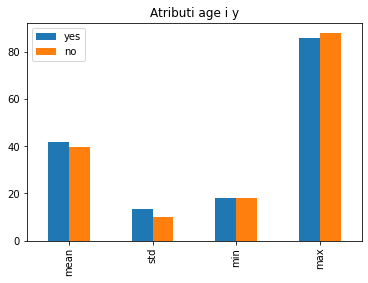

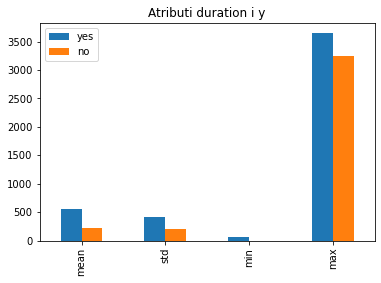

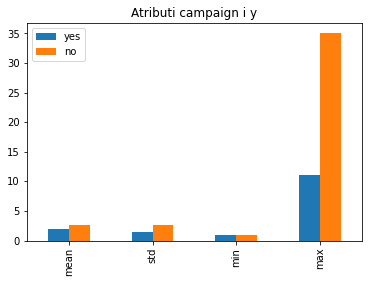

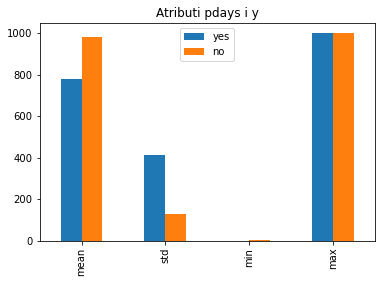

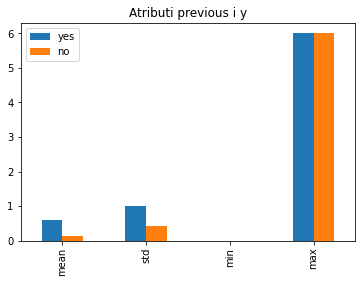

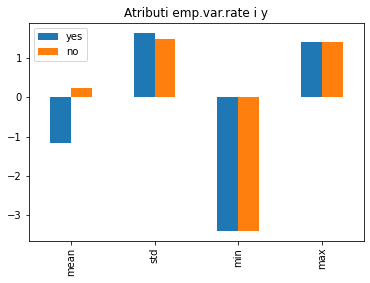

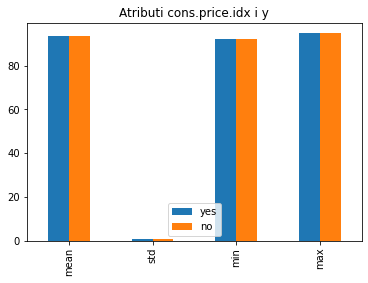

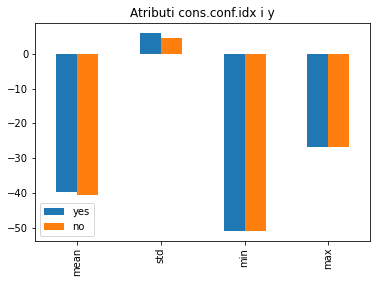

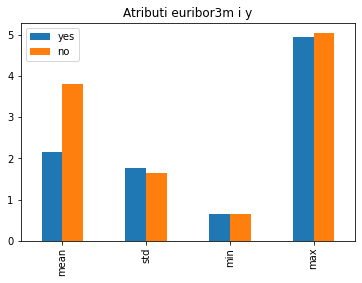

In [43]:
num_columns = ['age','duration', 'campaign','pdays', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    a_df = pd.DataFrame()
    a_df['yes'] = (df[df['y'] == 'yes'][['y',num_column]].describe())[num_column]
    a_df['no'] = (df[df['y'] == 'no'][['y',num_column]].describe())[num_column]

    
    a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Atributi '+num_column+' i y')
    
   
    
    counter +=1
    

In [44]:

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (df[df['y'] == 'no'][['y','age']].describe())['age']

print(a_df)
a_df


          age_yes       age_no
count  451.000000  3667.000000
mean    41.889135    39.897464
std     13.292977     9.865952
min     18.000000    18.000000
25%     31.000000    32.000000
50%     39.000000    38.000000
75%     51.000000    47.000000
max     86.000000    88.000000


,age_yes,age_no
count,451.000000,3667.000000
mean,41.889135,39.897464
std,13.292977,9.865952
min,18.000000,18.000000
25%,31.000000,32.000000
50%,39.000000,38.000000
75%,51.000000,47.000000
max,86.000000,88.000000


In [45]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object